# **Online Retail Customer Segmentation**




# **Problem Statement**

Your task is to group customers of a UK-based online gift shop into different categories based on their buying behavior. The data set you will be working with includes all the transactions made between 01/12/2010 and 09/12/2011. This company does not have a physical store and mainly sells unique gifts that can be given on any occasion. Many of the customers are wholesalers who purchase items in bulk.

# **Data Description**

1)InvoiceNo= Invoice number.

2)StockCode= Product code. 

3)Description= Product name.

4)Quantity= The quantities of each product per transaction. 

5)InvoiceDate=Invoice Date and time. 

6)UnitPrice= product price.

7)CustomerID=Customer number. 

8)Country=Country name. 

# **Github link** 
https://github.com/Kashfur/Online_Retail_Customer_Segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **importing libraries**

In [ ]:
#importing librarires
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [ ]:
#loading dataset rossmann
online_retail_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")

# **EDA OF THE DATASET**

In [ ]:
#viewing  data
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#data information
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#number of rows and columns
online_retail_df.shape

(541909, 8)

In [ ]:
#checking null values
online_retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#FILLING NA VALUES
online_retail_df['Description'].fillna('no description',inplace=True)
online_retail_df['CustomerID'].fillna('0.0',inplace=True)


In [ ]:
online_retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# description of data
online_retail_df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
#changing invoice date format to date-time format
online_retail_df['InvoiceDate']=pd.to_datetime(online_retail_df['InvoiceDate'])

In [ ]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#check number of unique values in data
online_retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4224
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
Country           38
dtype: int64

In [ ]:
#get list of cancelled order
cancelled_orders = online_retail_df[online_retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
#total cancelled orders
total_cancelled_orders=len(cancelled_orders['Quantity'])
total_cancelled_orders

9288

## **Countries with the most cancelled orders**

In [ ]:
#getting the most cancelled orders from countries
cancelled_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()
c_order_country=cancelled_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(5)
c_order_country

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112


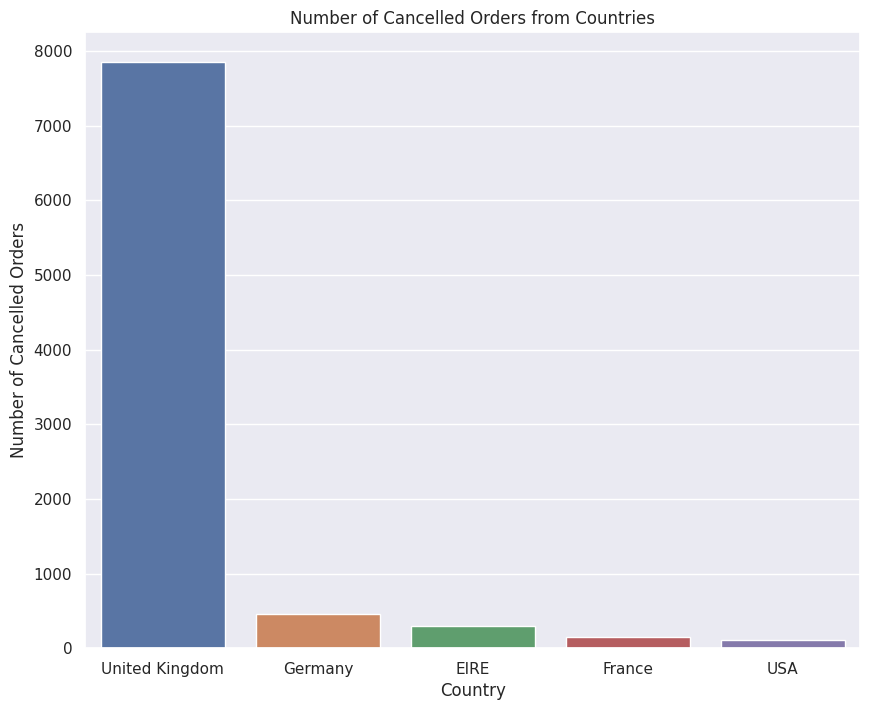

In [ ]:
#plotting the most cancelled orders from countries
plt.figure(figsize=(10,8))

sns.barplot(x='Country', y='InvoiceNo', data=c_order_country)

plt.xlabel('Country') 
plt.ylabel('Number of Cancelled Orders') 
plt.title('Number of Cancelled Orders from Countries') 

# Show the plot
plt.show()

In [ ]:
#creating total_cost column in dataset
online_retail_df['Total_cost']=online_retail_df['Quantity']*online_retail_df['UnitPrice']

In [ ]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **Revenue from each countries**

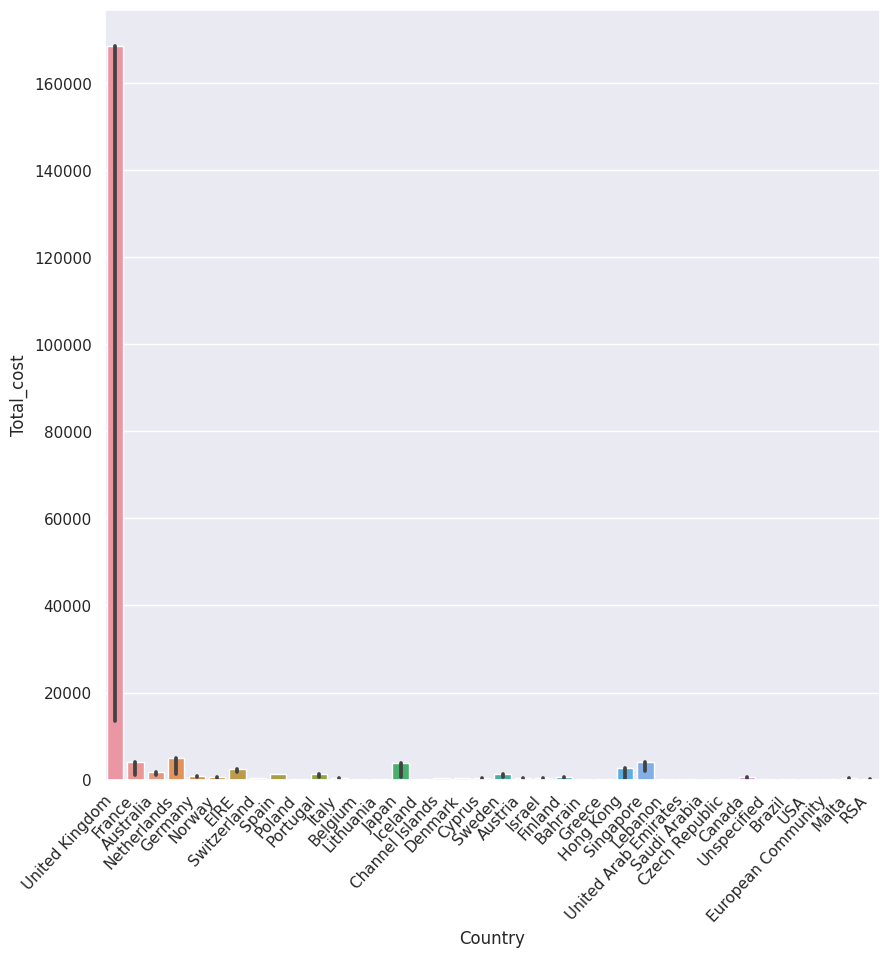

In [ ]:
#plotting revenue generated from each country

fig, ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(10, 10)

# Create a bar plot using seaborn
ax = sns.barplot(x='Country', y='Total_cost', data=online_retail_df, estimator=max, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

# Show the plot
plt.show()
     


In [ ]:
# The total revenue for each country
online_retail_df.groupby('Country').sum().sort_values(by='Total_cost', ascending=False)

,Quantity,UnitPrice,Total_cost
Country,,,
United Kingdom,4263829,2245715.474,8187806.364
Netherlands,200128,6492.550,284661.540
EIRE,142637,48447.190,263276.820
Germany,117448,37666.000,221698.210
France,110480,43031.990,197403.900
Australia,83653,4054.750,137077.270
Switzerland,30325,6813.690,56385.350
Spain,26824,12633.450,54774.580
Belgium,23152,7540.130,40910.960


# **orders from each countries**

In [ ]:
#orders from each countries
country_orders_df = online_retail_df['Country'].value_counts()
country_orders_df

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# **Top Customers**

In [ ]:
#top 10 customers
top_customers = pd.DataFrame(online_retail_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.head(10)

,index,CustomerID
0,0.0,135080
1,17841.0,7983
2,14911.0,5903
3,14096.0,5128
4,12748.0,4642
5,14606.0,2782
6,15311.0,2491
7,14646.0,2085
8,13089.0,1857
9,13263.0,1677


# **Customers Throughout the period**

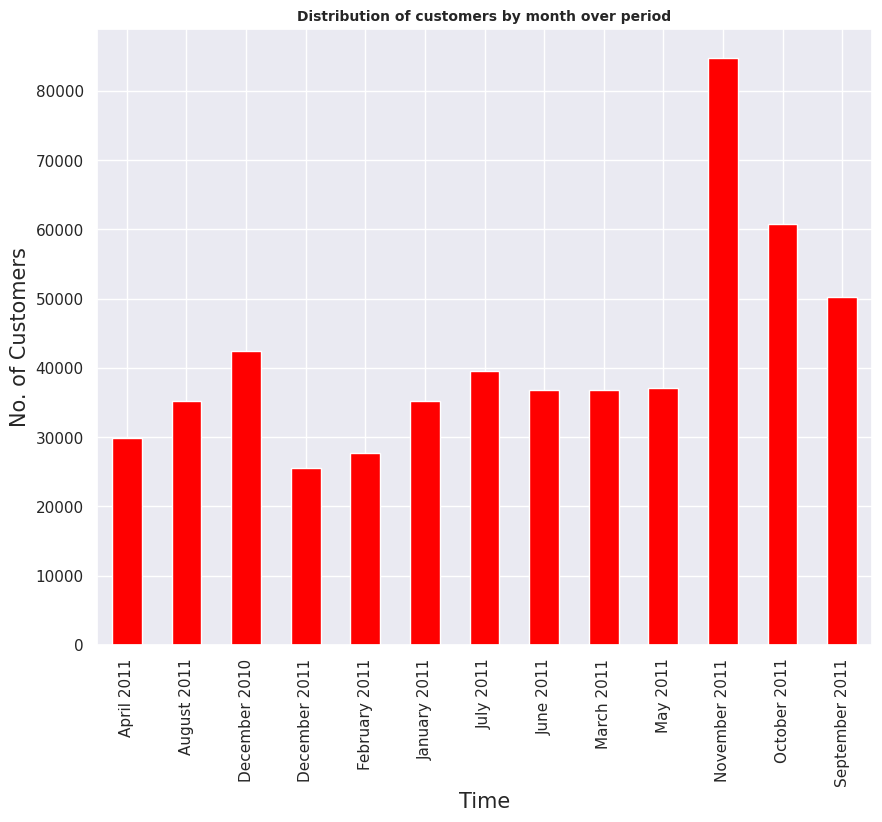

In [ ]:
#customers throughout the period
plt.figure(figsize=(10,8))

# Group the retail_df_copy dataframe by the month and year of the InvoiceDate column
# Count the number of unique CustomerID values in each group
monthly_customer_distribution = online_retail_df.groupby(online_retail_df['InvoiceDate'].dt.strftime('%B %Y'))['CustomerID'].count()

# Plot the customer distribution as a bar chart
monthly_customer_distribution.plot(kind='bar', color='red')

# Set the title and labels for the x and y axes
plt.title('Distribution of customers by month over period', size=10, fontweight='bold')
plt.xlabel('Time', size=15)
plt.ylabel('No. of Customers', size=15)

# Show the plot
plt.show()

# **Top 10 selling products**

In [ ]:
product_group = online_retail_df.groupby('Description').sum()['Quantity']

# Sort the data in descending order
product_group = product_group.sort_values(ascending=False)

# Select the top 10 items
top_10_selling_products = product_group.index[:10]

# Create a new dataframe to store the top 10 selling products
top_10_products_df = pd.DataFrame({'Product': top_10_selling_products, 'Quantity Sold': product_group.values[:10]})

# Print the result
top_10_products_df

,Product,Quantity Sold
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


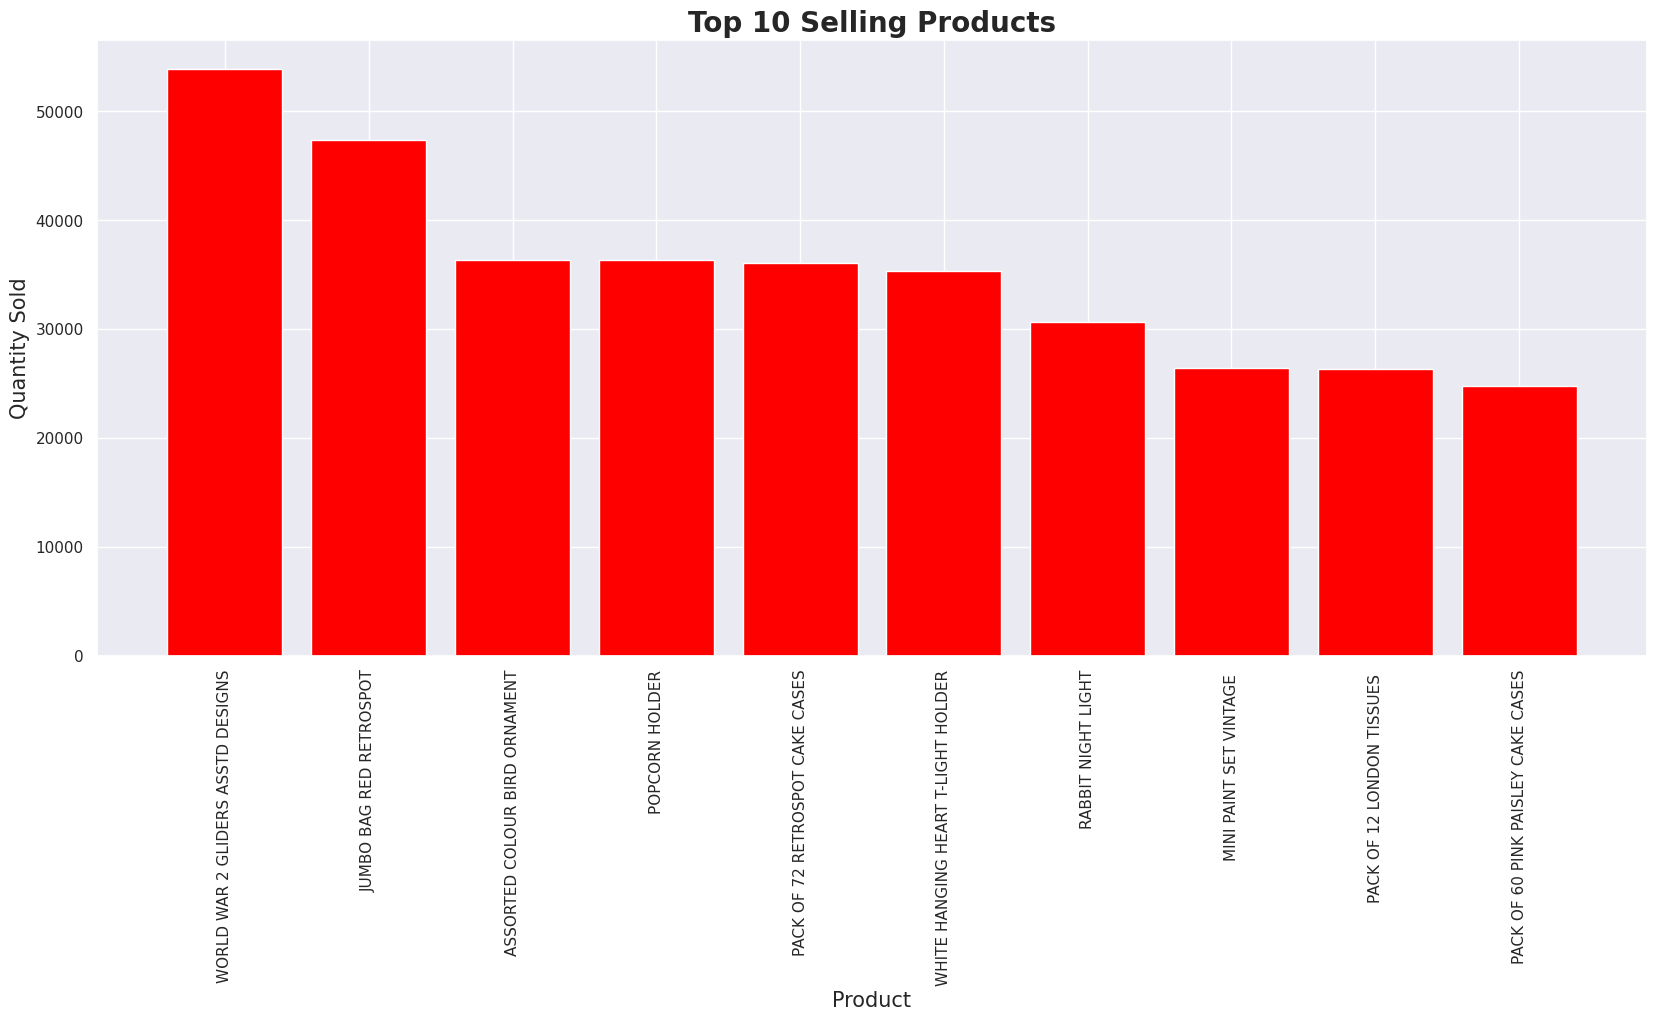

In [ ]:
# Plot the bar chart
plt.figure(figsize=(20, 8))
plt.bar(top_10_products_df['Product'], top_10_products_df['Quantity Sold'], color='red')

# Set the title and axis labels
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
plt.xlabel('Product', size=15)
plt.ylabel('Quantity Sold', size=15)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the chart
plt.show()

# **Feature engineering**

In [ ]:
#converting invoice data to date time
online_retail_df["InvoiceDate"] = pd.to_datetime(online_retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
#Creating a new features from Invoicedate
online_retail_df['Month']=online_retail_df['InvoiceDate'].dt.month_name()
online_retail_df['Day']=online_retail_df['InvoiceDate'].dt.day_name()
online_retail_df['Hour']=online_retail_df['InvoiceDate'].dt.hour

In [ ]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,8


In [ ]:
#month wise product sold
month_df=online_retail_df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,84711
1,December,68006
2,October,60742
3,September,50226
4,July,39518
5,May,37030
6,June,36874
7,March,36748
8,August,35284
9,January,35147


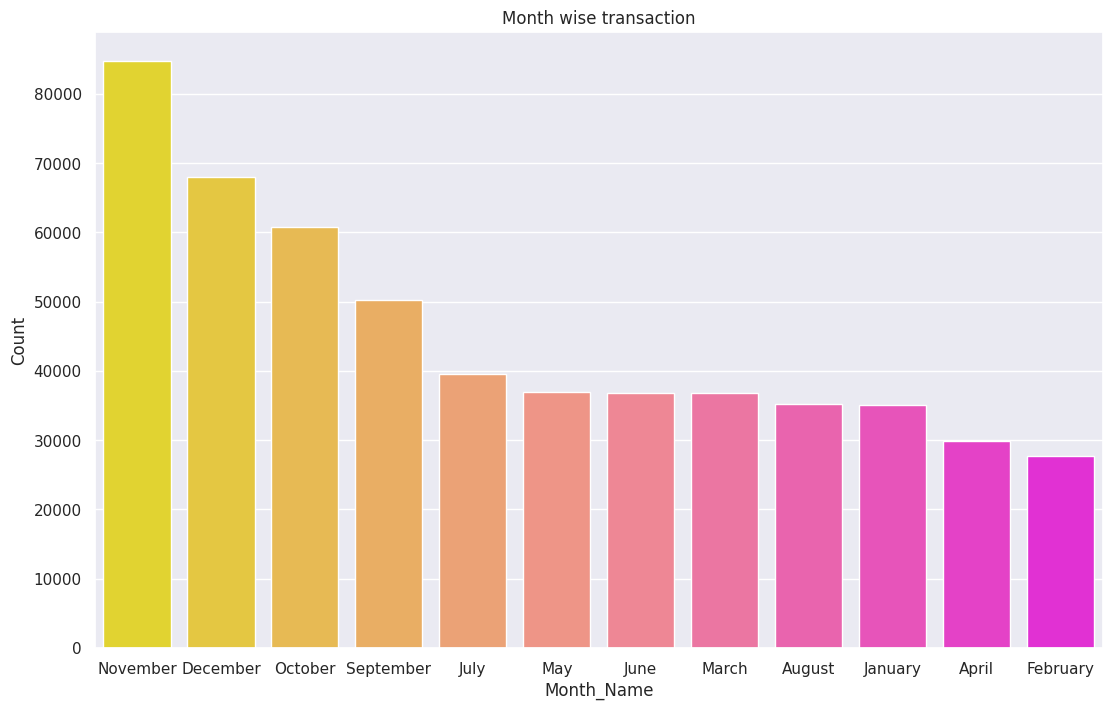

In [ ]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='spring_r');

In [ ]:
# hour wise product sold
hour_df=online_retail_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

,Hours,Count
0,12,78709
1,15,77519
2,13,72259
3,14,67471
4,11,57674
5,16,54516
6,10,49037
7,9,34332
8,17,28509
9,8,8909


<Axes: title={'center': 'Hour wise transaction'}, xlabel='Hours', ylabel='Count'>

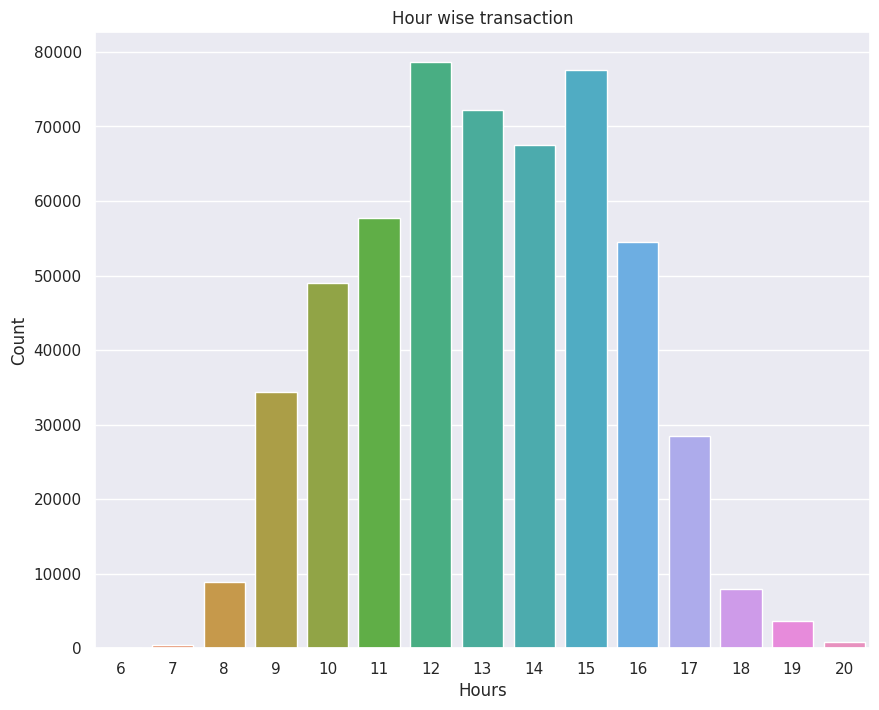

In [ ]:
#plotting for hour
plt.figure(figsize=(10,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hours',y='Count',data=hour_df)

# **RFM model**





RFM is a method used for analyzing customer value





In [ ]:
from scipy.stats import ttest_ind
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = online_retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_cost': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total_cost': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics 
rfm_df.Recency.describe()

count    4373.000000
mean       91.560256
std       100.770131
min         0.000000
25%        16.000000
50%        50.000000
75%       143.000000
max       373.000000
Name: Recency, dtype: float64

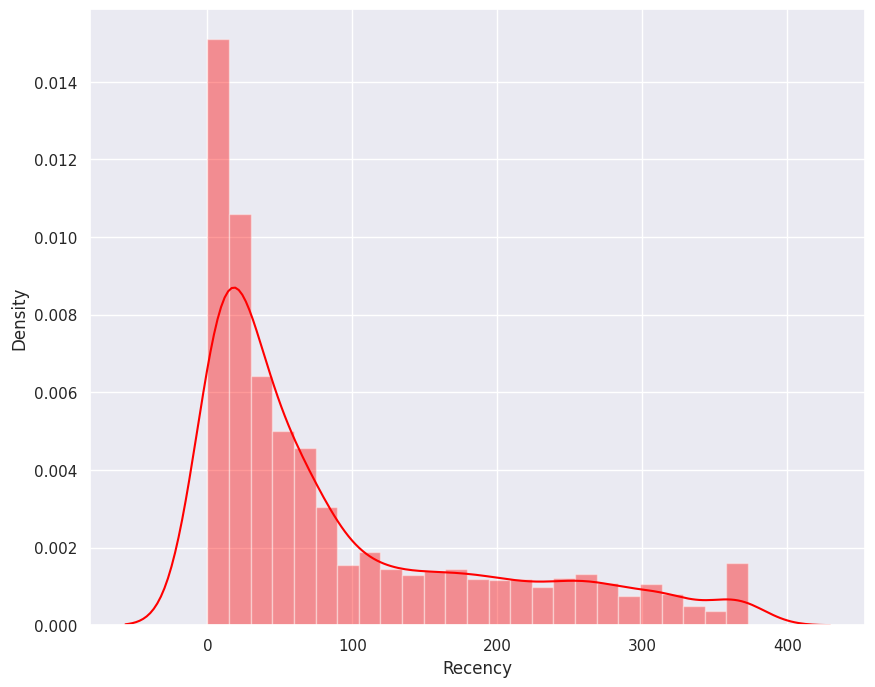

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='red');

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count      4373.000000
mean        123.921564
std        2054.469339
min           1.000000
25%          17.000000
50%          42.000000
75%         102.000000
max      135080.000000
Name: Frequency, dtype: float64

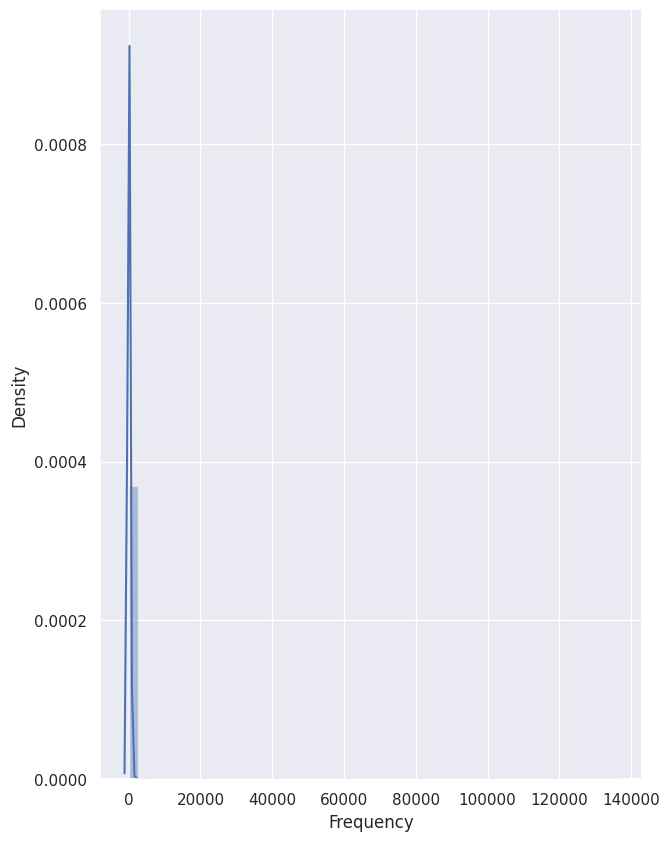

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(7,10))
sns.distplot(x,color='b');

<Axes: xlabel='Monetary', ylabel='Density'>

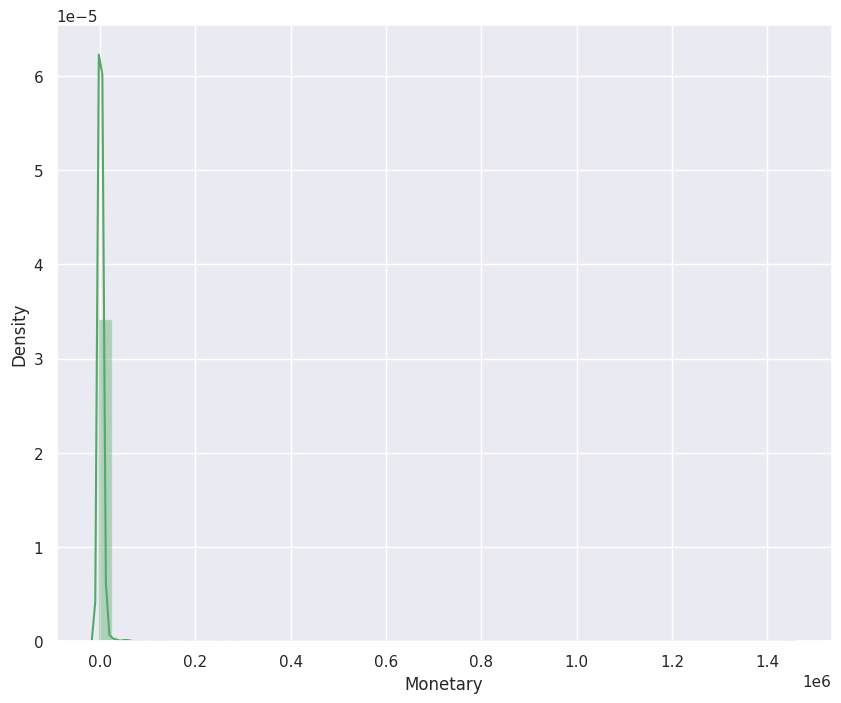

In [ ]:
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='g')

All are positively skewed

# **Splitting into four segments using quantiles.**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,2,0.00,4,4,4
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,4,4,444,12
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

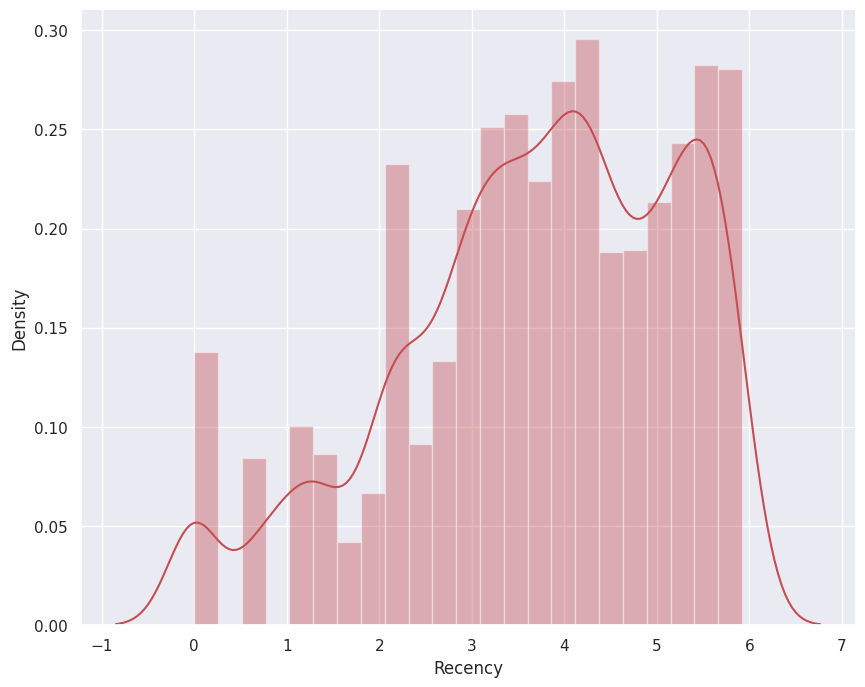

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

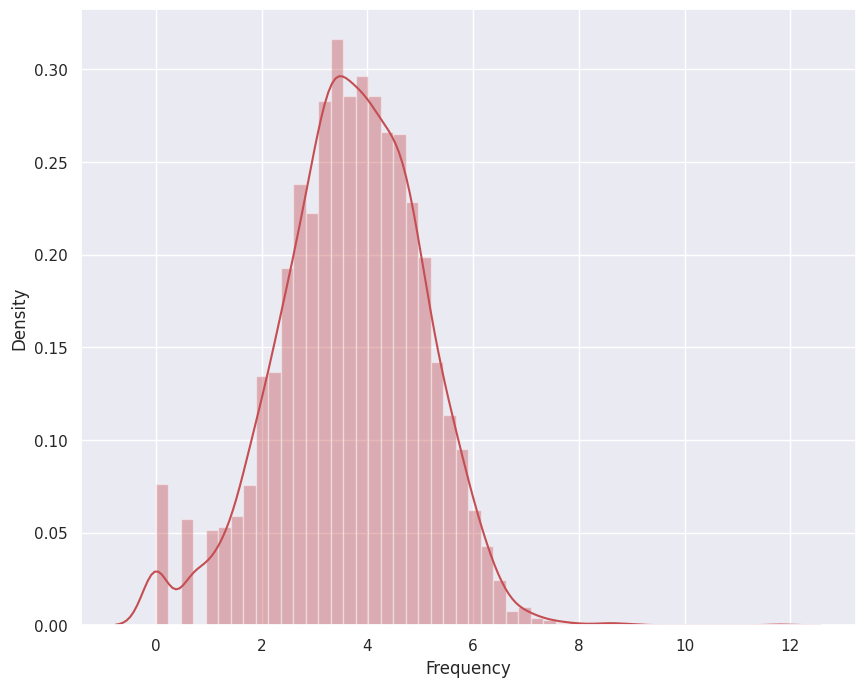

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

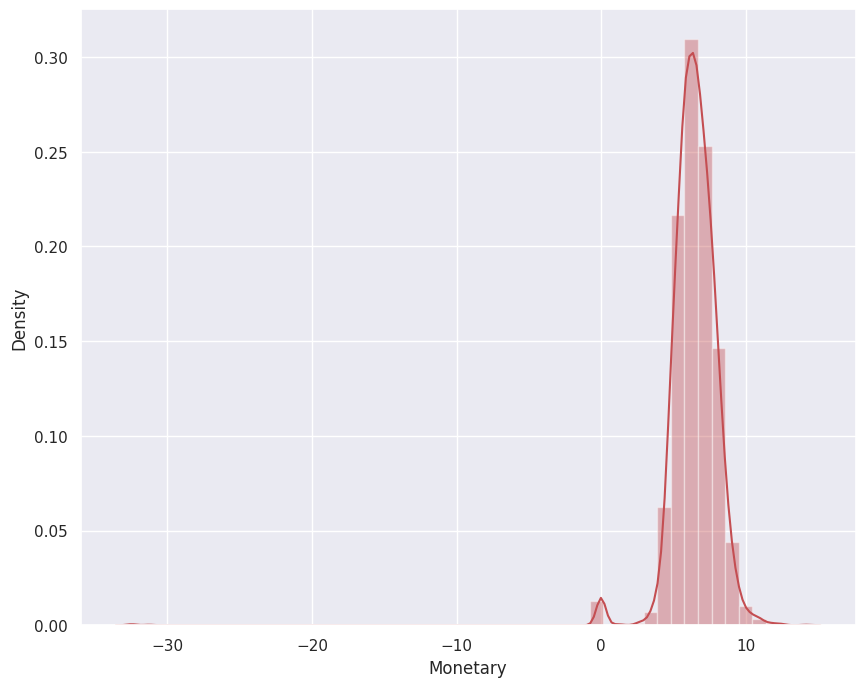

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **K-Means Clustering**

---



In [ ]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

 **Silhouette Score Method**

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4248158592864946
For n_clusters = 3, silhouette score is 0.4315106645425198
For n_clusters = 4, silhouette score is 0.3629957769309199
For n_clusters = 5, silhouette score is 0.3765565817135843
For n_clusters = 6, silhouette score is 0.38356802227995124
For n_clusters = 7, silhouette score is 0.37350204654595204
For n_clusters = 8, silhouette score is 0.3724505824347236
For n_clusters = 9, silhouette score is 0.36319283515848877
For n_clusters = 10, silhouette score is 0.3456585512417593
For n_clusters = 11, silhouette score is 0.3472730937901402
For n_clusters = 12, silhouette score is 0.3453917070482282
For n_clusters = 13, silhouette score is 0.3475508577808642
For n_clusters = 14, silhouette score is 0.34445959208154836
For n_clusters = 15, silhouette score is 0.3411033905443579


***Elbow Method***

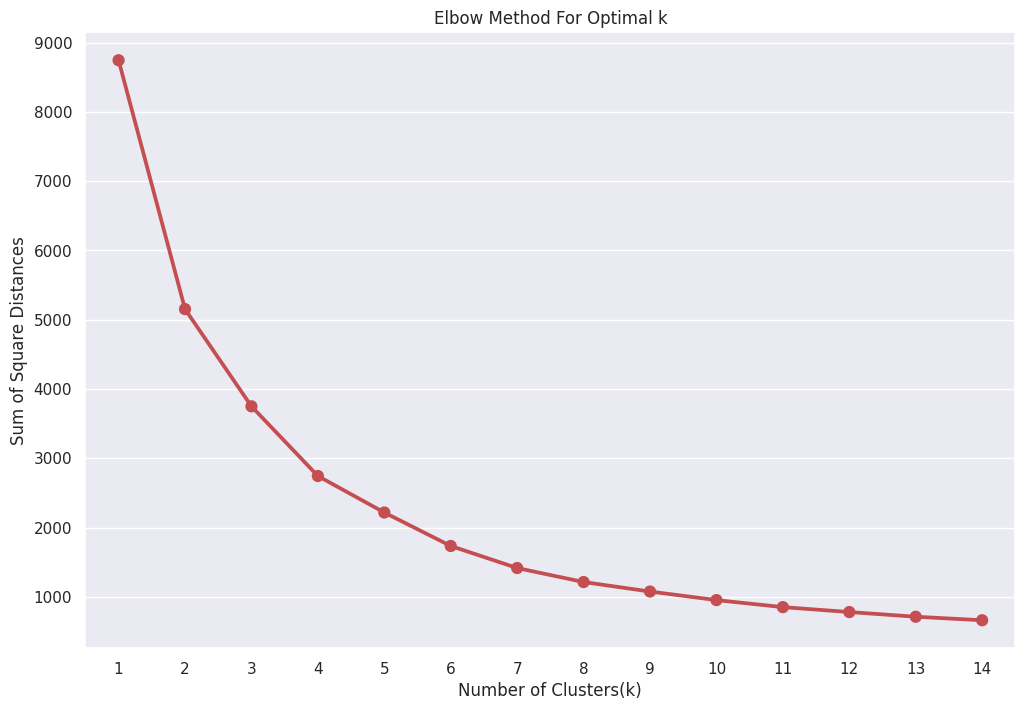

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

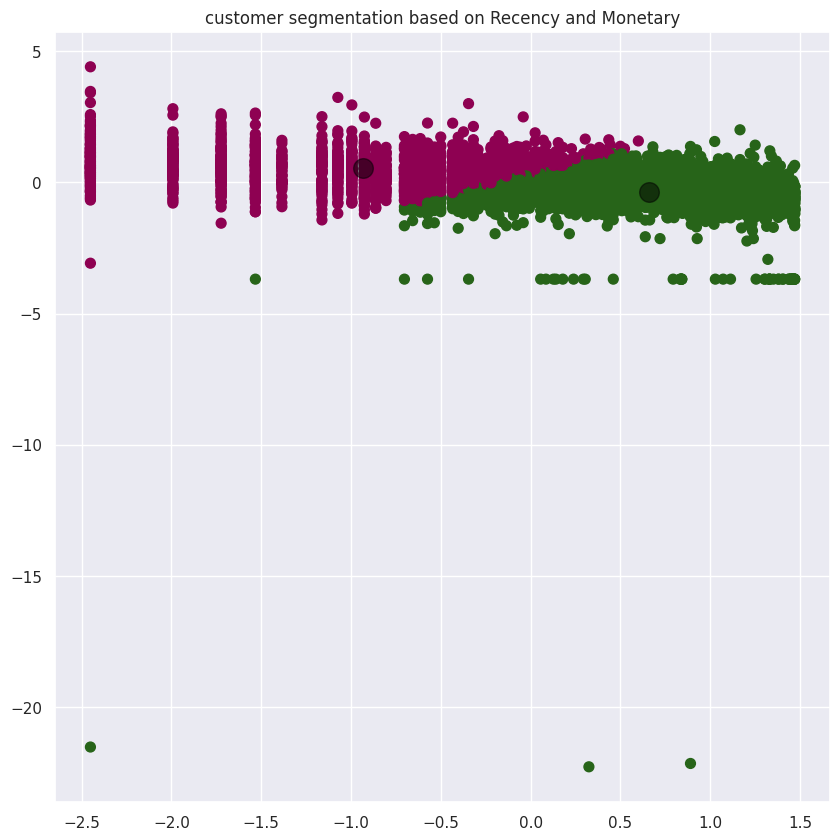

In [ ]:
plt.figure(figsize=(10,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# **Hierarchical clustering**

***Dendogram***

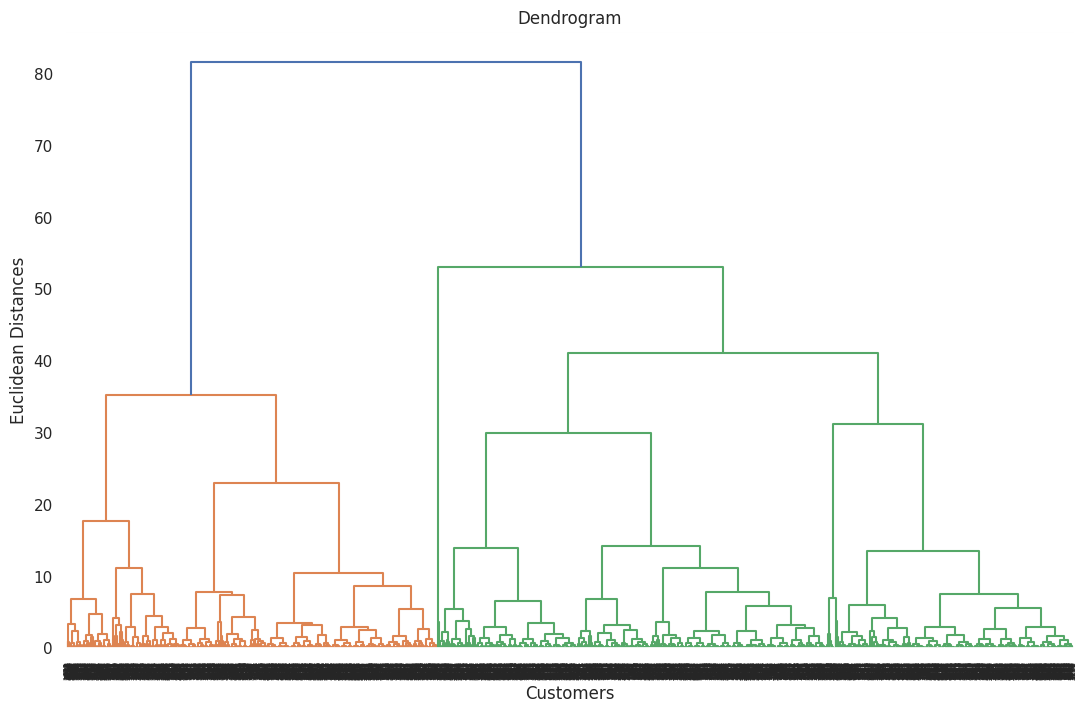

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 

In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

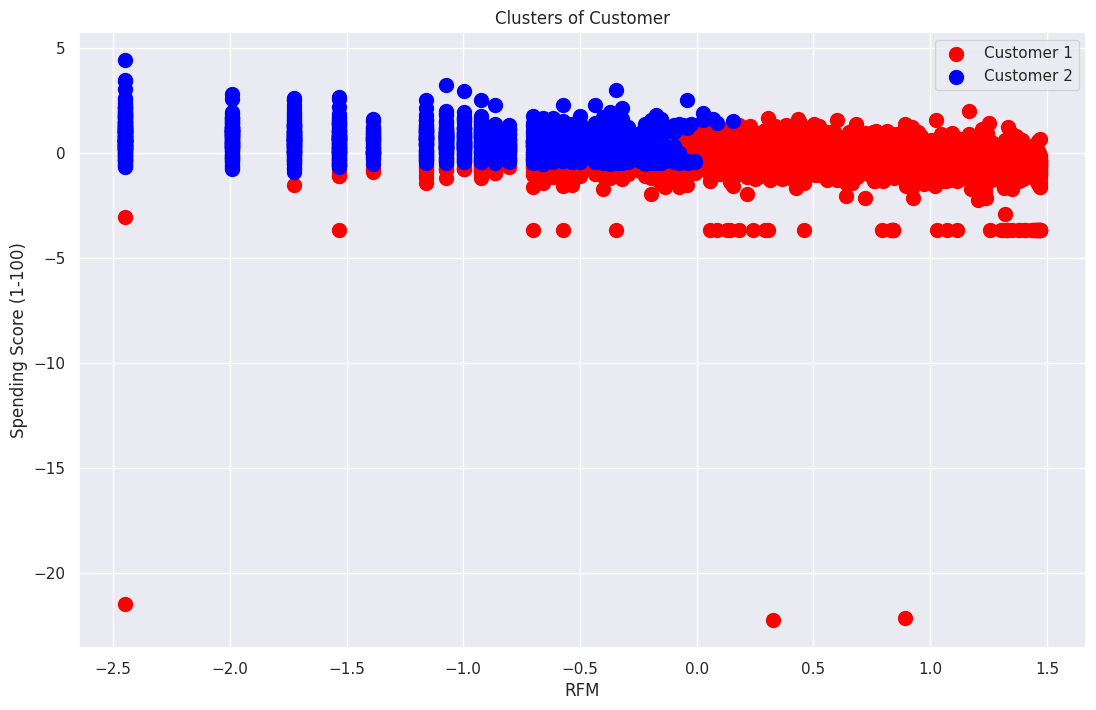

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Conclusion**

1)This project is focused on developing customer segments for a UK based online store.

2)Using a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters.

3)Two algorithms used-

k-means clustering 

Hierarchial clustering



